CSV files saved: mcd_breakfast_sales.csv and mcd_breakfast_demographics.csv


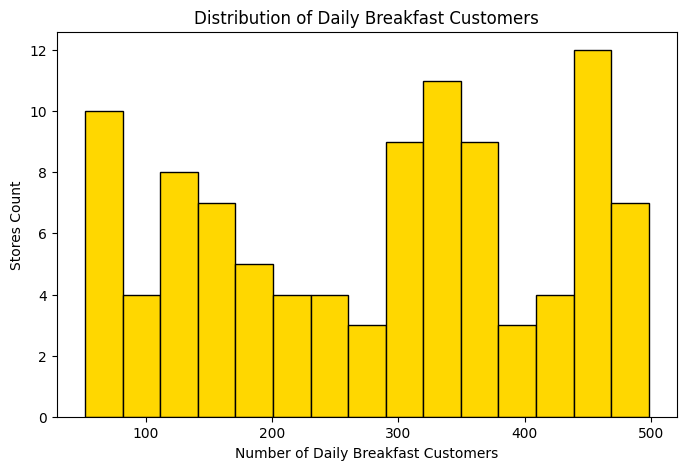

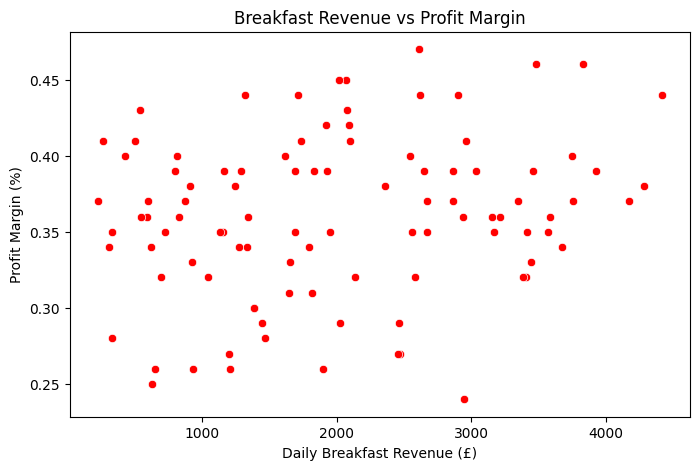

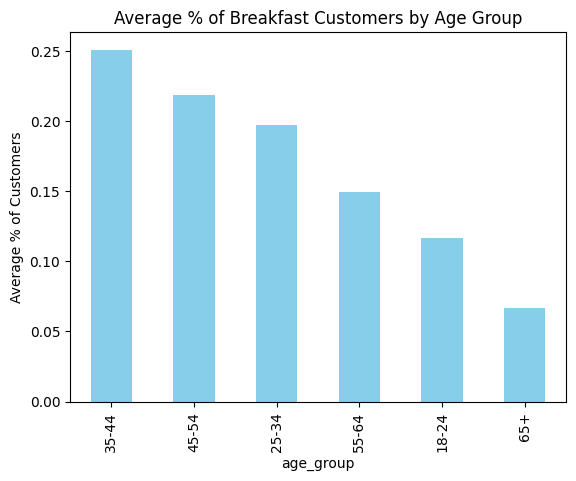

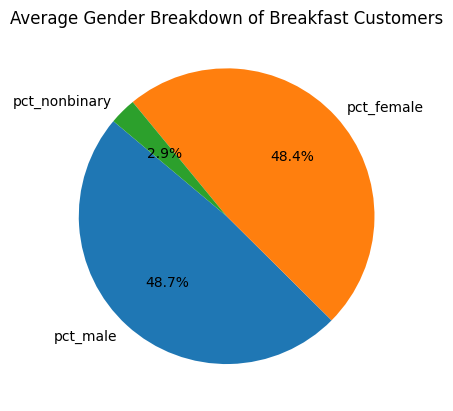

In [1]:
# %% [markdown]
# # McDonald’s Breakfast Sales & Demographics Dataset
# 
# This notebook creates a synthetic dataset to analyze breakfast sales, profit margins, and customer demographics
# at McDonald’s restaurants. The goal is to simulate a realistic sample dataset that captures typical trends.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %%
# -----------------------------
# PARAMETERS FOR SYNTHETIC DATA
# -----------------------------
np.random.seed(2026)

# Store count
n_stores = 100

# Generate store IDs
store_ids = [f"MCD_{i:03d}" for i in range(1, n_stores + 1)]

# %%
# -----------------------------
# GENERATE SALES & PROFIT DATA
# -----------------------------
data = {
    "store_id": store_ids,
    
    # Daily breakfast customers
    "daily_breakfast_customers": np.random.randint(50, 500, size=n_stores),
    
    # Average spend per customer (£)
    "avg_spend_per_customer": np.round(np.random.uniform(4.0, 10.0, size=n_stores), 2),
    
    # Revenue = customers * avg spend
    "daily_breakfast_revenue": None,
    
    # Cost of goods sold (assume ~40% of breakfast sales)
    "cost_of_goods": None,
    
    # Profit margin (%)
    "profit_margin_pct": None
}

# Compute derived fields
data["daily_breakfast_revenue"] = (
    data["daily_breakfast_customers"] * data["avg_spend_per_customer"]
)
data["cost_of_goods"] = data["daily_breakfast_revenue"] * 0.40

# Assuming varying profit margins influenced by pricing and cost efficiency
data["profit_margin_pct"] = np.round(
    np.random.normal(loc=0.35, scale=0.05, size=n_stores), 2
)

# Create the main DataFrame
df_sales = pd.DataFrame(data)

# %%
# -----------------------------
# GENERATE DEMOGRAPHIC DATA
# -----------------------------
# Typical age groups for breakfast purchases
age_groups = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
gender_choices = ["Male", "Female", "Non-binary"]

df_demo = pd.DataFrame({
    "store_id": np.repeat(store_ids, len(age_groups)),
    "age_group": age_groups * n_stores,
    
    # Percent of customers in each age group (normalised later)
    "pct_customers_age": np.random.dirichlet(alpha=[2,3,4,3,2,1], size=n_stores).flatten()
})

# Randomly assign gender proportions within each store
df_demo["pct_male"] = np.round(np.random.uniform(0.40, 0.60, size=len(df_demo)), 2)
df_demo["pct_female"] = np.round(1 - df_demo["pct_male"], 2)
df_demo["pct_nonbinary"] = np.round(np.random.uniform(0.01, 0.05, size=len(df_demo)), 2)

# %%
# -----------------------------
# SAVE CSV FILES
# -----------------------------
df_sales.to_csv("mcd_breakfast_sales.csv", index=False)
df_demo.to_csv("mcd_breakfast_demographics.csv", index=False)

print("CSV files saved: mcd_breakfast_sales.csv and mcd_breakfast_demographics.csv")

# %% [markdown]
# ## Exploratory Data Analysis (EDA)
# 
# Below are some examples of how you can explore and visualize this dataset.

# %%
# Quick look at the sales dataset
df_sales.describe()

# %%
# Histogram of daily breakfast customers
plt.figure(figsize=(8, 5))
plt.hist(df_sales["daily_breakfast_customers"], bins=15, color="gold", edgecolor="black")
plt.title("Distribution of Daily Breakfast Customers")
plt.xlabel("Number of Daily Breakfast Customers")
plt.ylabel("Stores Count")
plt.show()

# %%
# Scatter plot of revenue vs profit margin
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_sales,
    x="daily_breakfast_revenue",
    y="profit_margin_pct",
    color="red"
)
plt.title("Breakfast Revenue vs Profit Margin")
plt.xlabel("Daily Breakfast Revenue (£)")
plt.ylabel("Profit Margin (%)")
plt.show()

# %%
# Analyze demographics: average percent of customers by age group
age_summary = df_demo.groupby("age_group")["pct_customers_age"].mean().sort_values(ascending=False)
age_summary.plot(kind="bar", color="skyblue")
plt.title("Average % of Breakfast Customers by Age Group")
plt.ylabel("Average % of Customers")
plt.show()

# %%
# Compare gender proportions
gender_summary = df_demo[["pct_male", "pct_female", "pct_nonbinary"]].mean()
gender_summary.plot(kind="pie", autopct="%1.1f%%", startangle=140)
plt.title("Average Gender Breakdown of Breakfast Customers")
plt.ylabel("")
plt.show()
